In [3]:
%ls 'CSCGo LAMS- past 15 days.xlsx'

'CSCGo LAMS- past 15 days.xlsx'


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df1= pd.read_excel('CSCGo LAMS- past 15 days.xlsx', sheet_name='Sheet1')

In [6]:
df1['micro_txn_amt']= df1['app_txn_amount']+ df1['cc_txn_amount']
df1['micro_txn_num']= df1['app_txn_num']+ df1['cc_txn_num']

In [7]:
df1= df1.loc[df1.vend_amount>0]

In [8]:
df1['micro_num_pct']= df1['micro_txn_num']/ df1['txn_num']
df1['micro_txn_amt_pct']= df1['micro_txn_amt']/ df1['vend_amount']

In [9]:
df1['stored_val_amt_pct']= df1['stored_value_txn_amount']/ df1['vend_amount']
df1['stored_val_num_pct']= df1['stored_value_txn_num']/ df1['txn_num']
df1['other_txn_amt']= df1.vend_amount- df1.micro_txn_amt
df1['other_txn_num']= df1.txn_num- df1.micro_txn_num

In [10]:
df1.other_txn_num.describe()

count     604.000000
mean      313.526490
std       850.245126
min         0.000000
25%        28.000000
50%        99.000000
75%       260.250000
max      8570.000000
Name: other_txn_num, dtype: float64

In [11]:
# df1.loc[:,['micro_txn_amt', 'stored_value_txn_amount','other_txn_amt']]

In [12]:
df2= pd.read_excel('CSCGo LAMS- past 15 days.xlsx', sheet_name='Sheet2')

In [13]:
df2.shape

(611, 10)

In [18]:
df= df1.merge(df2, on='as400id', how='left')

In [26]:
df.micro_txn_amt_pct.describe()

count    604.000000
mean       0.168159
std        0.237060
min        0.000000
25%        0.002552
50%        0.075594
75%        0.208283
max        1.000000
Name: micro_txn_amt_pct, dtype: float64

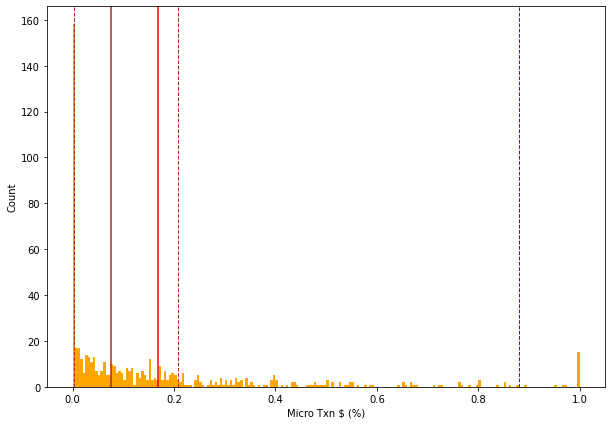

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
micro_txn_amt_pct,604,0.168159,0.23706,0,0.00255188,0.0755935,0.208283,1


In [22]:
plt.figure(figsize=(10,7))
plt.hist(df.micro_txn_amt_pct, color='orange', bins=200,log=False, histtype='bar')
plt.xlabel('Micro Txn $ (%)')
plt.ylabel('Count')
plt.axvline(df.micro_txn_amt_pct.mean(), color='red', linestyle='solid', linewidth=1.5)
plt.axvline(df.micro_txn_amt_pct.median(), color='brown', linestyle='solid', linewidth=1.5)
plt.axvline(df.micro_txn_amt_pct.describe().loc['25%'], color='brown', linestyle='dashed', linewidth=1)
plt.axvline(df.micro_txn_amt_pct.describe().loc['75%'], color='brown', linestyle='dashed', linewidth=1)
plt.axvline(df.micro_txn_amt_pct.describe().loc['mean']+ 3*df.micro_txn_amt_pct.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
# plt.axvline(df.SalePrice.describe().loc['mean']- 3*df.SalePrice.describe().loc['std'], color='purple', linestyle='dashed', linewidth=1)
plt.show()
df.micro_txn_amt_pct.describe().reset_index().T

In [24]:
df.isnull().sum()

as400id                     0
days_since_first_vend       0
vend_amount                 0
txn_num                     0
app_txn_amount              0
app_txn_num                 0
cash_txn_amount             0
cash_txn_num                0
cc_txn_amount               0
cc_txn_num                  0
stored_value_txn_amount     0
stored_value_txn_num        0
micro_txn_amt               0
micro_txn_num               0
micro_num_pct               0
micro_txn_amt_pct           0
stored_val_amt_pct          0
stored_val_num_pct          0
other_txn_amt               0
other_txn_num               0
Machine Count              41
Install Date               41
Branch                     41
Account_Name1              41
Vendor                     41
Install Age as of Today    41
Industry                   41
Industry Sub-Type          41
Property Class             41
dtype: int64

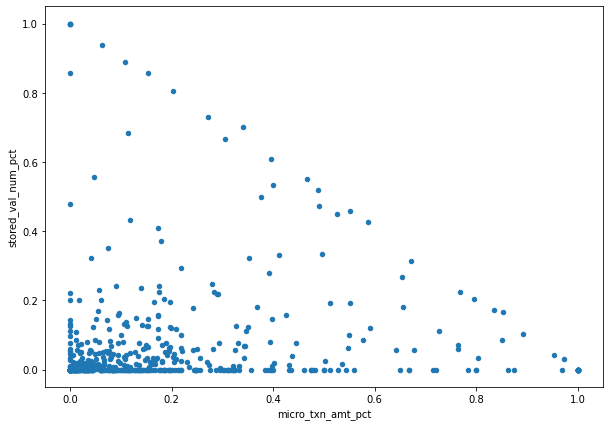

In [28]:
df.plot('micro_txn_amt_pct','stored_val_num_pct', kind='scatter', figsize=(10,7))

In [29]:
df.columns= [s.strip() for s in df.columns.to_list()]

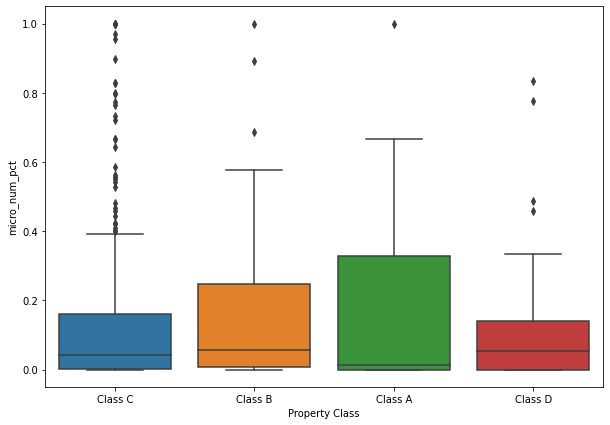

In [30]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x="Property Class", y="micro_num_pct", data=df.loc[df['Property Class']!=0], ax=ax)

In [31]:
df["Property Class"].value_counts()

Class C    437
Class B     59
Class D     36
0           23
Class A      8
Name: Property Class, dtype: int64

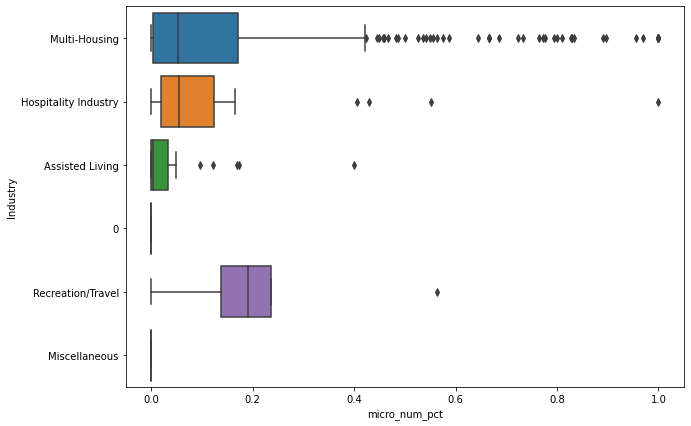

In [32]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(y='Industry', x="micro_num_pct", data=df, ax=ax, orient='h')

In [33]:
df.columns

Index(['as400id', 'days_since_first_vend', 'vend_amount', 'txn_num',
       'app_txn_amount', 'app_txn_num', 'cash_txn_amount', 'cash_txn_num',
       'cc_txn_amount', 'cc_txn_num', 'stored_value_txn_amount',
       'stored_value_txn_num', 'micro_txn_amt', 'micro_txn_num',
       'micro_num_pct', 'micro_txn_amt_pct', 'stored_val_amt_pct',
       'stored_val_num_pct', 'other_txn_amt', 'other_txn_num', 'Machine Count',
       'Install Date', 'Branch', 'Account_Name1', 'Vendor',
       'Install Age as of Today', 'Industry', 'Industry Sub-Type',
       'Property Class'],
      dtype='object')

In [34]:
df.micro_num_pct.describe([.05, .25, .75, .95])*100

count    60400.000000
mean        14.784833
std         22.790534
min          0.000000
5%           0.000000
25%          0.172570
50%          5.171403
75%         17.415063
95%         68.285714
max        100.000000
Name: micro_num_pct, dtype: float64

In [35]:
sel_exp= (df.Industry=='Multi-Housing') & (df['Industry Sub-Type']== 'Apartments')&\
(df['Install Age as of Today']>=30) & (df.micro_num_pct.between(.05,.95)) & (df['Machine Count'].between(4,20))

In [ ]:
sum(sel_exp)

108

In [ ]:
avg= df.micro_txn_amt.loc[sel_exp].sum()/ df.micro_txn_num.loc[sel_exp].sum()

In [ ]:
avg1= df.micro_txn_amt.loc[sel_exp]/ df.micro_txn_num.loc[sel_exp]

In [36]:
avg

NameError: ignored

In [39]:
len(df.loc[:, 'Machine Count'].value_counts())

38

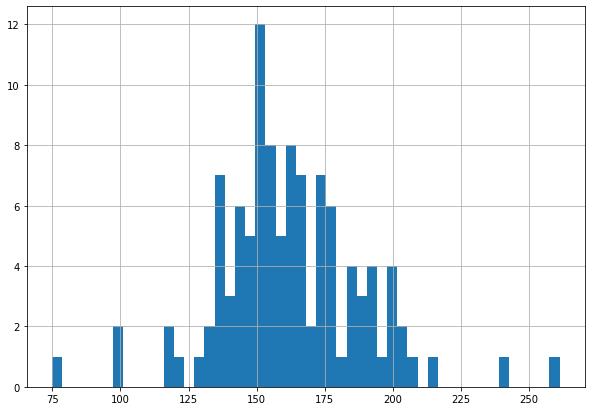

In [ ]:
avg1.hist(bins=50, figsize=(10,7))

In [ ]:
df3=df.loc[sel_exp, ['vend_amount', 'txn_num','micro_txn_amt', 'micro_txn_num', 'other_txn_amt','other_txn_num']].sum()

In [ ]:
df.loc[sel_exp, 'as400id'].to_csv('txnfees.csv')

In [ ]:
df3.micro_txn_num

5095

In [ ]:
#df.micro_txn_amt.loc[sel_exp].sum()/ df.micro_txn_num

In [ ]:
drop= (df3.micro_txn_num- df3.micro_txn_amt/(25+df3.micro_txn_amt/df3.micro_txn_num))/df3.micro_txn_num

In [ ]:
test_micro_txn_num= (1-drop)*df3.micro_txn_num

In [ ]:
test_micro_txn_num

4424.120147826537

In [ ]:
drop

0.13167416136868762

In [ ]:
p0= df3.micro_txn_num/ df3.txn_num

In [ ]:
p0

0.20231902473891117

In [ ]:
import numpy as np

Two-sided test with α =0.05 has 90% power

In [ ]:
rws=[]
for drop in [.12,.125,.131,.135, .14]:
  for loss in [.05,.07,.1]:
    p1= ((1-drop)*df3.micro_txn_num)/(df3.other_txn_num+drop*(1-loss)*df3.micro_txn_num)
    es= (p1-p0)/ np.sqrt(p1*(1-p1))
    n1 = round(((1.96+1.282)/es)**2,0)
    n2= round(((1.645+1.282)/es)**2,0)
    print(drop, loss, p0, p1,round((p1-p0),4), n1, n2, (1/es)**2, round(n1/test_micro_txn_num,0), round(n2/test_micro_txn_num,0))
    rws.append([drop, loss, n1, n2, round((p1-p0),4),(1/es)**2, round(n1/test_micro_txn_num,1)*2, round(n2/test_micro_txn_num,1)*2])

0.12 0.05 0.20231902473891117 0.21692567987641292 0.0146 8368.0 6821.0 796.1820789435127 2.0 2.0
0.12 0.07 0.20231902473891117 0.2170540924397924 0.0147 8227.0 6706.0 782.700238040469 2.0 2.0
0.12 0.1 0.20231902473891117 0.21724699659758143 0.0149 8021.0 6538.0 763.0920137215528 2.0 1.0
0.125 0.05 0.20231902473891117 0.21544088665115219 0.0131 10318.0 8410.0 981.6640187147198 2.0 2.0
0.125 0.07 0.20231902473891117 0.2155735819758363 0.0133 10117.0 8246.0 962.5367050623843 2.0 2.0
0.125 0.1 0.20231902473891117 0.2157729317349257 0.0135 9826.0 8009.0 934.8500343896151 2.0 2.0
0.131 0.05 0.20231902473891117 0.21366371276734372 0.0113 13721.0 11184.0 1305.431154942342 3.0 3.0
0.131 0.07 0.20231902473891117 0.21380144098063295 0.0115 13400.0 10922.0 1274.9005225769079 3.0 2.0
0.131 0.1 0.20231902473891117 0.21400836654772012 0.0117 12939.0 10547.0 1231.0297804206257 3.0 2.0
0.135 0.05 0.20231902473891117 0.21248169500336495 0.0102 17029.0 13881.0 1620.1920984985322 4.0 3.0
0.135 0.07 0.2023

In [ ]:
pd.DataFrame.from_records(rws, columns=['Micro Txn Drop%',	'Loss to External %',	'Required Sample Size-95% sign','Required Sample Size-90% sign',	'After Test- Before Test', 'inverse effect Size^2','# Weeks 95% significance','# Weeks 90% significance' ])

,Micro Txn Drop%,Loss to External %,Required Sample Size-95% sign,Required Sample Size-90% sign,After Test- Before Test,inverse effect Size^2,# Weeks 95% significance,# Weeks 90% significance
0,0.120,0.05,8368.0,6821.0,0.0146,796.182079,3.8,3.0
1,0.120,0.07,8227.0,6706.0,0.0147,782.700238,3.8,3.0
2,0.120,0.10,8021.0,6538.0,0.0149,763.092014,3.6,3.0
3,0.125,0.05,10318.0,8410.0,0.0131,981.664019,4.6,3.8
4,0.125,0.07,10117.0,8246.0,0.0133,962.536705,4.6,3.8
5,0.125,0.10,9826.0,8009.0,0.0135,934.850034,4.4,3.6
6,0.131,0.05,13721.0,11184.0,0.0113,1305.431155,6.2,5.0
7,0.131,0.07,13400.0,10922.0,0.0115,1274.900523,6.0,5.0
8,0.131,0.10,12939.0,10547.0,0.0117,1231.029780,5.8,4.8
9,0.135,0.05,17029.0,13881.0,0.0102,1620.192098,7.6,6.2
